In [1]:
import pandas as pd
import duckdb

In [ ]:
# read data for first week of May
df_fare = pd.read_csv("trip_fare_5.csv",skipinitialspace=True) # remove space in column name

df_fare.head()


,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,3B1A31779BCE30367D00C6F7911573C0,AED0496C937E41C4515D64E851F873AB,VTS,2013-05-01 00:04:00,CSH,7.0,0.5,0.5,0.0,0.0,8.0
1,61F54249450649B22FCF456774A2F24F,9D871F2AE5ACF24D04C00484C8ECEF90,VTS,2013-05-01 00:03:00,CRD,9.5,0.5,0.5,2.0,0.0,12.5
2,160CA9331707228AC5BD584FDBF18B3C,18F9F1A9E76B707F7D15FC2B39E0BE33,VTS,2013-05-01 00:04:00,CRD,6.5,0.5,0.5,1.0,0.0,8.5
3,8F1DBE78C521F384A55AD0C77F75545D,AC4F234E82B375187FBAF428E10824D8,VTS,2013-05-01 00:05:00,CSH,5.5,0.5,0.5,0.0,0.0,6.5
4,C901A9DE8D66C4F05813EB48C50F0686,10E1D1418B5B22C82255FFC638547625,VTS,2013-05-01 00:05:00,CRD,8.5,0.5,0.5,1.8,0.0,11.3


In [ ]:
df_fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15285049 entries, 0 to 15285048
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   medallion        object 
 1   hack_license     object 
 2   vendor_id        object 
 3   pickup_datetime  object 
 4   payment_type     object 
 5   fare_amount      float64
 6   surcharge        float64
 7   mta_tax          float64
 8   tip_amount       float64
 9   tolls_amount     float64
 10  total_amount     float64
dtypes: float64(6), object(5)
memory usage: 1.3+ GB


In [ ]:
df_fare['pickup_datetime'] = pd.to_datetime(df_fare['pickup_datetime'])

In [ ]:
df_fare.columns

Index(['medallion', 'hack_license', 'vendor_id', 'pickup_datetime',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')

In [ ]:
# extract to csv
df_fare.loc[df_fare["pickup_datetime"] <= "2013-05-07"]
# zip

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,3B1A31779BCE30367D00C6F7911573C0,AED0496C937E41C4515D64E851F873AB,VTS,2013-05-01 00:04:00,CSH,7.0,0.5,0.5,0.0,0.0,8.0
1,61F54249450649B22FCF456774A2F24F,9D871F2AE5ACF24D04C00484C8ECEF90,VTS,2013-05-01 00:03:00,CRD,9.5,0.5,0.5,2.0,0.0,12.5
2,160CA9331707228AC5BD584FDBF18B3C,18F9F1A9E76B707F7D15FC2B39E0BE33,VTS,2013-05-01 00:04:00,CRD,6.5,0.5,0.5,1.0,0.0,8.5
3,8F1DBE78C521F384A55AD0C77F75545D,AC4F234E82B375187FBAF428E10824D8,VTS,2013-05-01 00:05:00,CSH,5.5,0.5,0.5,0.0,0.0,6.5
4,C901A9DE8D66C4F05813EB48C50F0686,10E1D1418B5B22C82255FFC638547625,VTS,2013-05-01 00:05:00,CRD,8.5,0.5,0.5,1.8,0.0,11.3
...,...,...,...,...,...,...,...,...,...,...,...
14577468,144FAAC33016FED7523040FE8E28E857,8EFCFADCCE133A8CBA00282827637D9C,CMT,2013-05-02 12:07:59,CSH,8.0,0.0,0.5,0.0,0.0,8.5
15053914,85E0A289F58009CF568A928219082EDC,D8524C74DF3D973FC12F9603EF64DCDE,CMT,2013-05-03 23:26:43,CSH,15.5,0.5,0.5,0.0,0.0,16.5
15061731,85E0A289F58009CF568A928219082EDC,D8524C74DF3D973FC12F9603EF64DCDE,CMT,2013-05-03 21:18:35,CSH,13.0,0.5,0.5,0.0,0.0,14.0
15080369,85E0A289F58009CF568A928219082EDC,D8524C74DF3D973FC12F9603EF64DCDE,CMT,2013-05-04 01:47:47,CSH,4.0,0.5,0.5,0.0,0.0,5.0


In [ ]:
compression_opts = dict(method='zip',

                        archive_name='trip_fare_5_week1.csv')  

df_fare.loc[df_fare["pickup_datetime"] < "2013-05-08"].to_csv('trip_fare_5_week1.zip', index=False,

          compression=compression_opts)  

In [ ]:
df_trip = pd.read_csv("trip_data_5.csv",skipinitialspace=True)
# or : pd.read_csv("Data_files/iris.zip",
#                  compression = "zip")

df_trip.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,3B1A31779BCE30367D00C6F7911573C0,AED0496C937E41C4515D64E851F873AB,VTS,1,NaN,2013-05-01 00:04:00,2013-05-01 00:12:00,1,480,1.34,-73.982285,40.772816,-73.986214,40.758743
1,61F54249450649B22FCF456774A2F24F,9D871F2AE5ACF24D04C00484C8ECEF90,VTS,1,NaN,2013-05-01 00:03:00,2013-05-01 00:10:00,5,420,2.60,-73.963013,40.711899,-73.991875,40.721916
2,160CA9331707228AC5BD584FDBF18B3C,18F9F1A9E76B707F7D15FC2B39E0BE33,VTS,1,NaN,2013-05-01 00:04:00,2013-05-01 00:10:00,2,360,1.31,-73.981781,40.724354,-73.973755,40.736893
3,8F1DBE78C521F384A55AD0C77F75545D,AC4F234E82B375187FBAF428E10824D8,VTS,1,NaN,2013-05-01 00:05:00,2013-05-01 00:09:00,1,240,0.82,-73.964020,40.709690,-73.950897,40.710972
4,C901A9DE8D66C4F05813EB48C50F0686,10E1D1418B5B22C82255FFC638547625,VTS,1,NaN,2013-05-01 00:05:00,2013-05-01 00:14:00,1,540,1.65,-73.973915,40.752789,-73.996201,40.755867


In [ ]:
df_trip.info()
df_trip.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15285049 entries, 0 to 15285048
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   medallion           object        
 1   hack_license        object        
 2   vendor_id           object        
 3   rate_code           int64         
 4   store_and_fwd_flag  object        
 5   pickup_datetime     datetime64[ns]
 6   dropoff_datetime    object        
 7   passenger_count     int64         
 8   trip_time_in_secs   int64         
 9   trip_distance       float64       
 10  pickup_longitude    float64       
 11  pickup_latitude     float64       
 12  dropoff_longitude   float64       
 13  dropoff_latitude    float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(5)
memory usage: 1.6+ GB


Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [ ]:
df_trip['pickup_datetime'] = pd.to_datetime(df_trip['pickup_datetime'])
  

In [ ]:
compression_opts = dict(method='zip',

                        archive_name='trip_data_5_week1.csv')  

df_trip.loc[df_trip["pickup_datetime"] < "2013-05-08"].to_csv('trip_data_5_week1.zip', index=False,

          compression=compression_opts)

In [ ]:
df_trip.loc[df_trip["pickup_datetime"] <= "2013-05-07"]["pickup_datetime"].max()

Timestamp('2013-05-07 00:00:00')



```
# This is formatted as code
```

# Data preparation

In [6]:
import duckdb

In [9]:
import pandas as pd

In [19]:
df_trip = pd.read_csv("trip_data_5_week1.zip",parse_dates=["pickup_datetime","dropoff_datetime"])
df_trip.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,3B1A31779BCE30367D00C6F7911573C0,AED0496C937E41C4515D64E851F873AB,VTS,1,NaN,2013-05-01 00:04:00,2013-05-01 00:12:00,1,480,1.34,-73.982285,40.772816,-73.986214,40.758743
1,61F54249450649B22FCF456774A2F24F,9D871F2AE5ACF24D04C00484C8ECEF90,VTS,1,NaN,2013-05-01 00:03:00,2013-05-01 00:10:00,5,420,2.60,-73.963013,40.711899,-73.991875,40.721916
2,160CA9331707228AC5BD584FDBF18B3C,18F9F1A9E76B707F7D15FC2B39E0BE33,VTS,1,NaN,2013-05-01 00:04:00,2013-05-01 00:10:00,2,360,1.31,-73.981781,40.724354,-73.973755,40.736893
3,8F1DBE78C521F384A55AD0C77F75545D,AC4F234E82B375187FBAF428E10824D8,VTS,1,NaN,2013-05-01 00:05:00,2013-05-01 00:09:00,1,240,0.82,-73.964020,40.709690,-73.950897,40.710972
4,C901A9DE8D66C4F05813EB48C50F0686,10E1D1418B5B22C82255FFC638547625,VTS,1,NaN,2013-05-01 00:05:00,2013-05-01 00:14:00,1,540,1.65,-73.973915,40.752789,-73.996201,40.755867


In [12]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572653 entries, 0 to 3572652
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   medallion           object        
 1   hack_license        object        
 2   vendor_id           object        
 3   rate_code           int64         
 4   store_and_fwd_flag  object        
 5   pickup_datetime     datetime64[ns]
 6   dropoff_datetime    datetime64[ns]
 7   passenger_count     int64         
 8   trip_time_in_secs   int64         
 9   trip_distance       float64       
 10  pickup_longitude    float64       
 11  pickup_latitude     float64       
 12  dropoff_longitude   float64       
 13  dropoff_latitude    float64       
dtypes: datetime64[ns](2), float64(5), int64(3), object(4)
memory usage: 381.6+ MB


In [20]:

df_fare = pd.read_csv("trip_fare_5_week1.zip",parse_dates=["pickup_datetime"])
df_fare.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,3B1A31779BCE30367D00C6F7911573C0,AED0496C937E41C4515D64E851F873AB,VTS,2013-05-01 00:04:00,CSH,7.0,0.5,0.5,0.0,0.0,8.0
1,61F54249450649B22FCF456774A2F24F,9D871F2AE5ACF24D04C00484C8ECEF90,VTS,2013-05-01 00:03:00,CRD,9.5,0.5,0.5,2.0,0.0,12.5
2,160CA9331707228AC5BD584FDBF18B3C,18F9F1A9E76B707F7D15FC2B39E0BE33,VTS,2013-05-01 00:04:00,CRD,6.5,0.5,0.5,1.0,0.0,8.5
3,8F1DBE78C521F384A55AD0C77F75545D,AC4F234E82B375187FBAF428E10824D8,VTS,2013-05-01 00:05:00,CSH,5.5,0.5,0.5,0.0,0.0,6.5
4,C901A9DE8D66C4F05813EB48C50F0686,10E1D1418B5B22C82255FFC638547625,VTS,2013-05-01 00:05:00,CRD,8.5,0.5,0.5,1.8,0.0,11.3


In [21]:
# joining data
join_query = " SELECT * FROM df_fare INNER JOIN df_trip USING (hack_license, medallion, pickup_datetime, vendor_id)"
df = duckdb.query(join_query).df()
df.head()


,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,store_and_fwd_flag,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,3B1A31779BCE30367D00C6F7911573C0,AED0496C937E41C4515D64E851F873AB,VTS,2013-05-01 00:04:00,CSH,7.0,0.5,0.5,0.0,0.0,8.0,1,NaN,2013-05-01 00:12:00,1,480,1.34,-73.982285,40.772816,-73.986214,40.758743
1,61F54249450649B22FCF456774A2F24F,9D871F2AE5ACF24D04C00484C8ECEF90,VTS,2013-05-01 00:03:00,CRD,9.5,0.5,0.5,2.0,0.0,12.5,1,NaN,2013-05-01 00:10:00,5,420,2.60,-73.963013,40.711899,-73.991875,40.721916
2,8F1DBE78C521F384A55AD0C77F75545D,AC4F234E82B375187FBAF428E10824D8,VTS,2013-05-01 00:05:00,CSH,5.5,0.5,0.5,0.0,0.0,6.5,1,NaN,2013-05-01 00:09:00,1,240,0.82,-73.964020,40.709690,-73.950897,40.710972
3,9353AADDE79A8025BF13B6AC32BA3AE7,77E045C4E502526C9E3789116DA97DFE,VTS,2013-05-01 00:00:00,CRD,11.0,0.5,0.5,2.3,0.0,14.3,1,NaN,2013-05-01 00:12:00,5,720,2.41,-74.002357,40.750324,-73.972885,40.756096
4,FE1E7CE591DA8AEFA76005982EE399F2,F20370C70B1E67499C48C517315E8DE6,VTS,2013-05-01 00:05:00,CRD,9.0,0.5,0.5,1.0,0.0,11.0,1,NaN,2013-05-01 00:12:00,1,420,2.42,-74.009293,40.724731,-73.998672,40.754932


In [22]:
# cleaning missing
df.isnull().sum()
# cleaning negative fare values


medallion                   0
hack_license                0
vendor_id                   0
pickup_datetime             0
payment_type                0
fare_amount                 0
surcharge                   0
mta_tax                     0
tip_amount                  0
tolls_amount                0
total_amount                0
rate_code                   0
store_and_fwd_flag    1779513
dropoff_datetime            0
passenger_count             0
trip_time_in_secs           0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude          17
dropoff_latitude           17
dtype: int64

In [23]:
# dropping store_and_fwd_flag columns because having too many missing value
df = df.drop('store_and_fwd_flag', axis=1)


In [26]:
# dropping rows with null dropoff_longitude or dropoff_latitude
df = df[~df.dropoff_latitude.isnull()]
df = df[~df.dropoff_longitude.isnull()]

In [27]:
# dropping outlier location data, likely due to error
longitude_limit = [-74.027, -73.85] # NYC coordinate
latitude_limit = [40.67, 40.85]

df = df[(df.pickup_longitude.between(longitude_limit[0], longitude_limit[1], inclusive=False))]
df = df[(df.dropoff_longitude.between(longitude_limit[0], longitude_limit[1], inclusive=False))]
df = df[(df.pickup_latitude.between(latitude_limit[0], latitude_limit[1], inclusive=False))]
df = df[(df.dropoff_latitude.between(latitude_limit[0], latitude_limit[1], inclusive=False))]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  


In [28]:
df.describe()

,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,3.345212e+06,3.345212e+06,3.345212e+06,3.345212e+06,3.345212e+06,3.345212e+06,3.345212e+06,3.345212e+06,3.345212e+06,3.345212e+06,3.345212e+06,3.345212e+06,3.345212e+06,3.345212e+06
mean,1.104017e+01,3.289923e-01,4.996742e-01,1.211004e+00,1.536857e-01,1.323352e+01,1.004474e+00,1.712679e+00,7.058130e+02,2.448025e+00,-7.397869e+01,4.075271e+01,-7.397718e+01,4.075280e+01
std,6.815680e+00,3.649245e-01,1.275983e-02,1.702557e+00,8.999685e-01,8.295373e+00,2.813237e-01,1.383448e+00,4.674029e+02,2.290481e+00,2.362805e-02,2.315038e-02,2.411436e-02,2.584309e-02
min,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.402693e+01,4.067000e+01,-7.402699e+01,4.067001e+01
25%,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00,3.600000e+02,1.030000e+00,-7.399265e+01,4.073769e+01,-7.399191e+01,4.073704e+01
50%,9.000000e+00,5.000000e-01,5.000000e-01,1.000000e+00,0.000000e+00,1.100000e+01,1.000000e+00,1.000000e+00,6.000000e+02,1.700000e+00,-7.398225e+01,4.075390e+01,-7.398098e+01,4.075433e+01
75%,1.350000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.550000e+01,1.000000e+00,2.000000e+00,9.210000e+02,2.990000e+00,-7.396889e+01,4.076833e+01,-7.396646e+01,4.076884e+01
max,4.500100e+02,1.350000e+01,5.000000e-01,1.991800e+02,1.800000e+01,4.500100e+02,2.100000e+02,6.000000e+00,1.078700e+04,1.000000e+02,-7.385001e+01,4.084998e+01,-7.385001e+01,4.085000e+01


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3315495 entries, 0 to 3572648
Data columns (total 21 columns):
 #   Column             Dtype         
---  ------             -----         
 0   medallion          object        
 1   hack_license       object        
 2   vendor_id          object        
 3   pickup_datetime    datetime64[ns]
 4   payment_type       object        
 5   fare_amount        float64       
 6   surcharge          float64       
 7   mta_tax            float64       
 8   tip_amount         float64       
 9   tolls_amount       float64       
 10  total_amount       float64       
 11  rate_code          int64         
 12  dropoff_datetime   datetime64[ns]
 13  passenger_count    int64         
 14  trip_time_in_secs  int64         
 15  trip_distance      float64       
 16  pickup_longitude   float64       
 17  pickup_latitude    float64       
 18  dropoff_longitude  float64       
 19  dropoff_latitude   float64       
 20  speed              float

In [29]:
# removing trip where duration or distance = 0 
df = df[df.trip_time_in_secs>0]
df = df[df.trip_distance>0.0]



In [32]:
# Let's create a feature to determine the speed of taxicabs.
df['speed'] = df.trip_distance/(df.trip_time_in_secs/3600.0) # miles per hour

In [34]:
df['speed'].describe()
df['speed'].max()
# 83160 mph is probably due to error

83160.0

In [36]:
# limit to trips with speed of 80 mph - highway speed limit in US, using threshold of 100 mph for buffer of error of measurement
df = df[df.speed < 100.0]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3307513 entries, 0 to 3572648
Data columns (total 21 columns):
 #   Column             Dtype         
---  ------             -----         
 0   medallion          object        
 1   hack_license       object        
 2   vendor_id          object        
 3   pickup_datetime    datetime64[ns]
 4   payment_type       object        
 5   fare_amount        float64       
 6   surcharge          float64       
 7   mta_tax            float64       
 8   tip_amount         float64       
 9   tolls_amount       float64       
 10  total_amount       float64       
 11  rate_code          int64         
 12  dropoff_datetime   datetime64[ns]
 13  passenger_count    int64         
 14  trip_time_in_secs  int64         
 15  trip_distance      float64       
 16  pickup_longitude   float64       
 17  pickup_latitude    float64       
 18  dropoff_longitude  float64       
 19  dropoff_latitude   float64       
 20  speed              float

In [38]:
# cleaned table
df.describe()

,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,speed
count,3.307513e+06,3.307513e+06,3.307513e+06,3.307513e+06,3.307513e+06,3.307513e+06,3.307513e+06,3.307513e+06,3.307513e+06,3.307513e+06,3.307513e+06,3.307513e+06,3.307513e+06,3.307513e+06,3.307513e+06
mean,1.103935e+01,3.293751e-01,4.998620e-01,1.210804e+00,1.514039e-01,1.323080e+01,1.002629e+00,1.717443e+00,7.086994e+02,2.452201e+00,-7.397880e+01,4.075269e+01,-7.397722e+01,4.075279e+01,1.278013e+01
std,6.710790e+00,3.649886e-01,8.306054e-03,1.690585e+00,8.929312e-01,8.182654e+00,2.715390e-01,1.388109e+00,4.657457e+02,2.238634e+00,2.348540e-02,2.312425e-02,2.406214e-02,2.583915e-02,7.302512e+00
min,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.000000e-02,-7.402693e+01,4.067000e+01,-7.402699e+01,4.067001e+01,1.621622e-02
25%,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00,3.600000e+02,1.060000e+00,-7.399268e+01,4.073767e+01,-7.399191e+01,4.073702e+01,8.345455e+00
50%,9.000000e+00,5.000000e-01,5.000000e-01,1.000000e+00,0.000000e+00,1.100000e+01,1.000000e+00,1.000000e+00,6.000000e+02,1.720000e+00,-7.398228e+01,4.075386e+01,-7.398100e+01,4.075433e+01,1.140000e+01
75%,1.350000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.550000e+01,1.000000e+00,2.000000e+00,9.250000e+02,3.000000e+00,-7.396903e+01,4.076831e+01,-7.396652e+01,4.076884e+01,1.542857e+01
max,4.500100e+02,1.350000e+01,5.000000e-01,1.991800e+02,1.800000e+01,4.500100e+02,2.100000e+02,6.000000e+00,1.078700e+04,8.060000e+01,-7.385001e+01,4.084998e+01,-7.385001e+01,4.085000e+01,1.000000e+02


In [39]:
# saving clean and merged data
compression_opts = dict(method='zip',

                        archive_name='df_5_week1.csv')  
df.to_csv('df_5_week1.zip', index=False,

          compression=compression_opts)

In [40]:
!cp df_5_week1.zip ./gdrive/MyDrive/Portfolio/

# Analysis

In [46]:


import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# from geopy.geocoders import Nominatim
# geolocator = Nominatim()

# Initialize Basemap
import matplotlib.pyplot as plt
import matplotlib.cm
 
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

# View all columns on the screen
pd.set_option('max_columns', 100)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',1000)



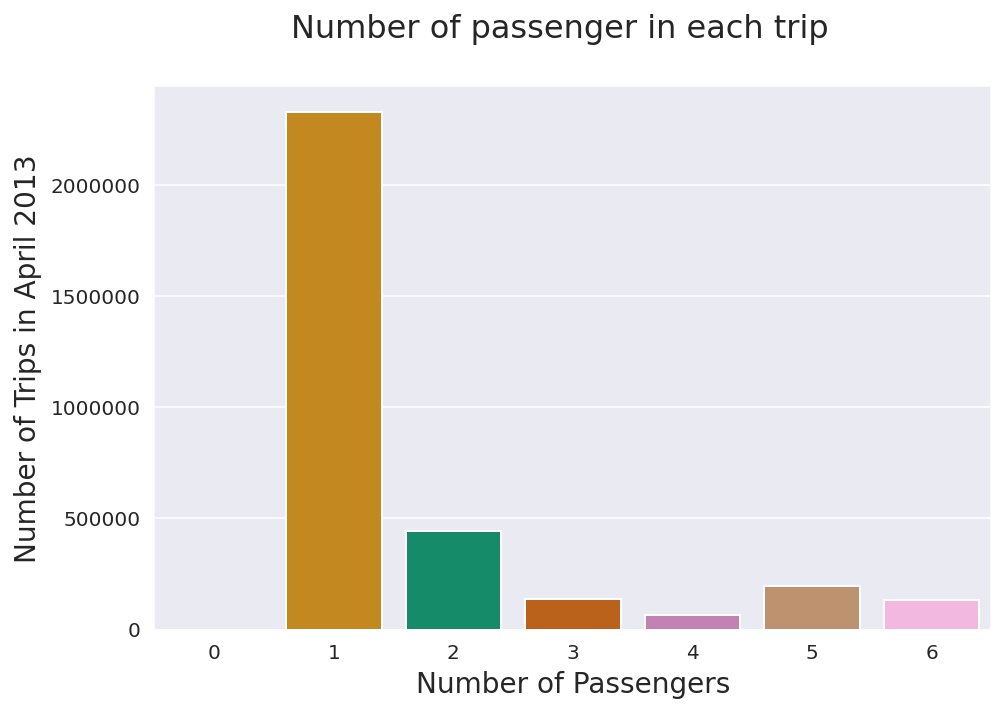

In [48]:


fig, ax = plt.subplots(figsize=(7.5,5))
fig.suptitle('Number of passenger in each trip', fontsize=16)
ax = sns.countplot(x='passenger_count', data = df, palette = 'colorblind', ax=ax)
ax.set_xlabel('Number of Passengers', fontsize=14)
ax.set_ylabel('Number of Trips in April 2013', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
None



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


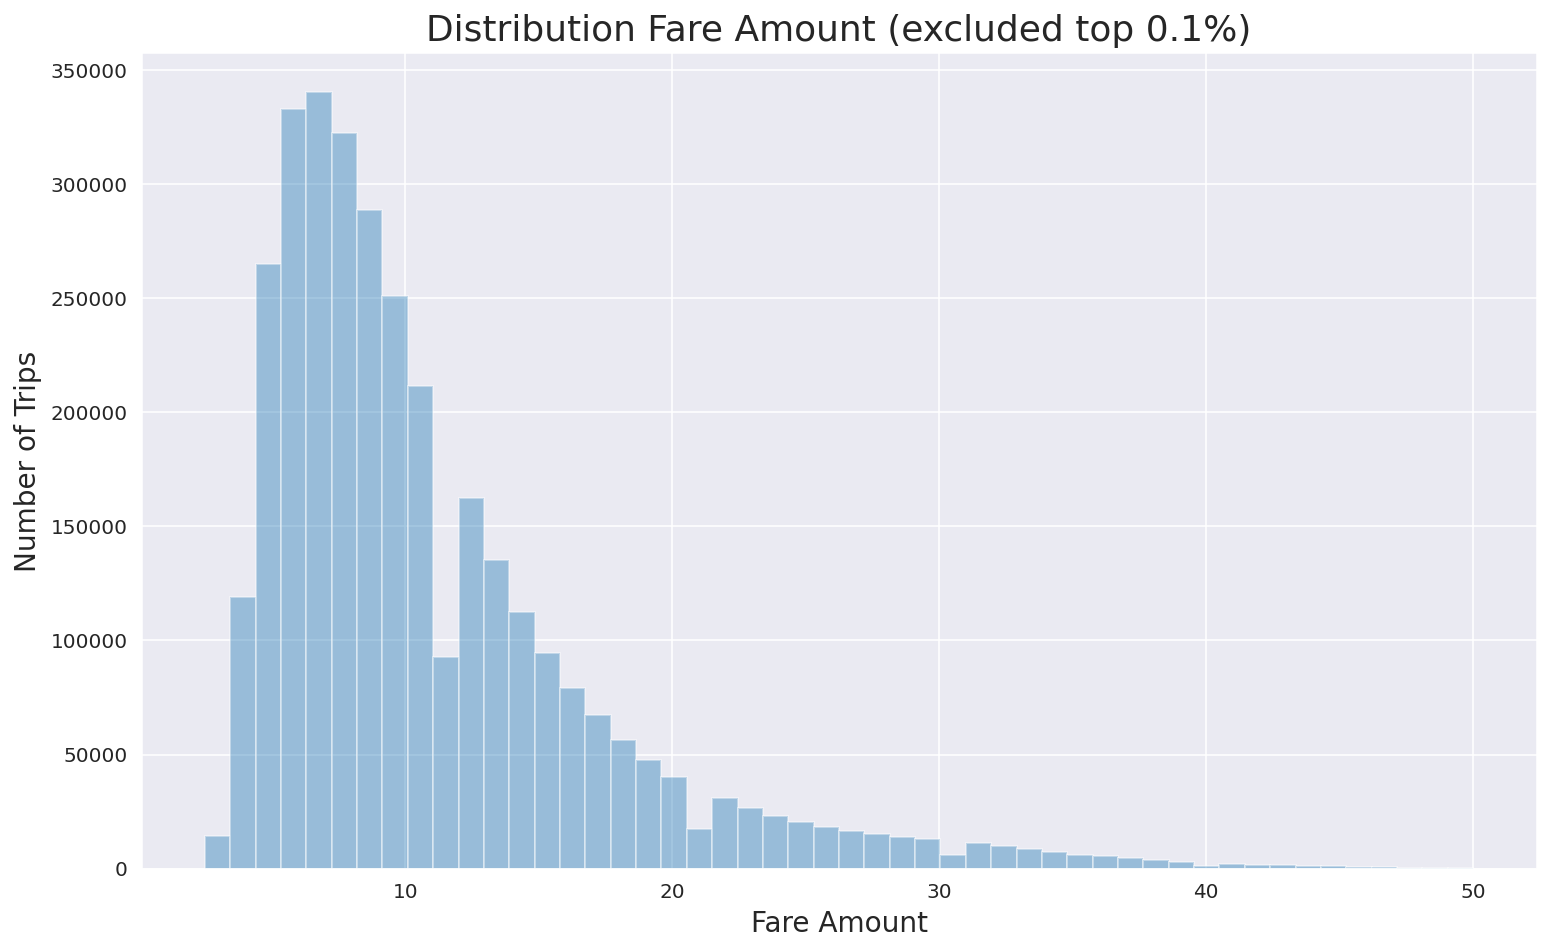

In [52]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(df[df.fare_amount < df.fare_amount.quantile(0.999)].fare_amount, kde=False)
ax.set_title('Distribution Fare Amount (excluded top 0.1%)', fontsize=18)
ax.set_xlabel('Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


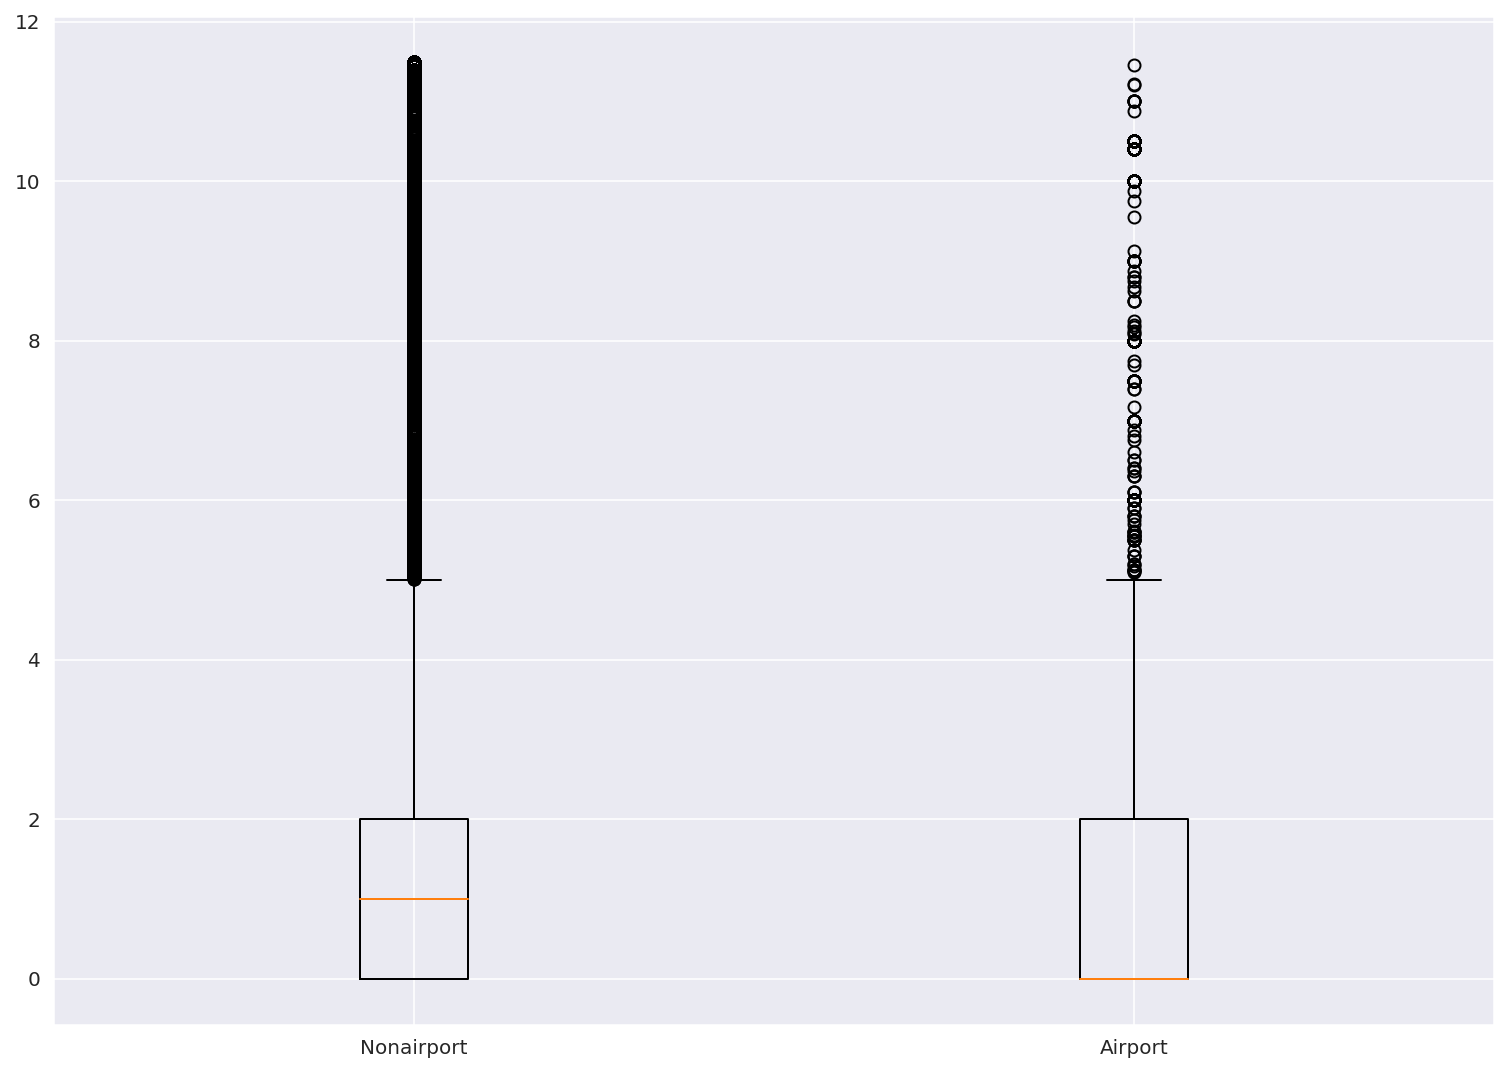

In [91]:
data_1 = df[(df.tip_amount < df.tip_amount.quantile(0.999)) & (df.rate_code == 1) & (df.rate_code != 5)].tip_amount
data_2 = df[(df.tip_amount < df.tip_amount.quantile(0.999)) & (df.rate_code != 1) & (df.rate_code != 5)].tip_amount

data = [data_1, data_2]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
plt.xticks([1, 2], ['Nonairport', 'Airport'])
# show plot
plt.show()

In [94]:
df['DayofWeek'] = df.pickup_datetime.dt.day_name()
df['Hour'] = df.pickup_datetime.dt.hour
df.head()



,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,speed,DayofWeek,Hour
0,3B1A31779BCE30367D00C6F7911573C0,AED0496C937E41C4515D64E851F873AB,VTS,2013-05-01 00:04:00,CSH,7.0,0.5,0.5,0.0,0.0,8.0,1,2013-05-01 00:12:00,1,480,1.34,-73.982285,40.772816,-73.986214,40.758743,10.050000,Wednesday,0
1,61F54249450649B22FCF456774A2F24F,9D871F2AE5ACF24D04C00484C8ECEF90,VTS,2013-05-01 00:03:00,CRD,9.5,0.5,0.5,2.0,0.0,12.5,1,2013-05-01 00:10:00,5,420,2.60,-73.963013,40.711899,-73.991875,40.721916,22.285714,Wednesday,0
2,8F1DBE78C521F384A55AD0C77F75545D,AC4F234E82B375187FBAF428E10824D8,VTS,2013-05-01 00:05:00,CSH,5.5,0.5,0.5,0.0,0.0,6.5,1,2013-05-01 00:09:00,1,240,0.82,-73.964020,40.709690,-73.950897,40.710972,12.300000,Wednesday,0
3,9353AADDE79A8025BF13B6AC32BA3AE7,77E045C4E502526C9E3789116DA97DFE,VTS,2013-05-01 00:00:00,CRD,11.0,0.5,0.5,2.3,0.0,14.3,1,2013-05-01 00:12:00,5,720,2.41,-74.002357,40.750324,-73.972885,40.756096,12.050000,Wednesday,0
4,FE1E7CE591DA8AEFA76005982EE399F2,F20370C70B1E67499C48C517315E8DE6,VTS,2013-05-01 00:05:00,CRD,9.0,0.5,0.5,1.0,0.0,11.0,1,2013-05-01 00:12:00,1,420,2.42,-74.009293,40.724731,-73.998672,40.754932,20.742857,Wednesday,0


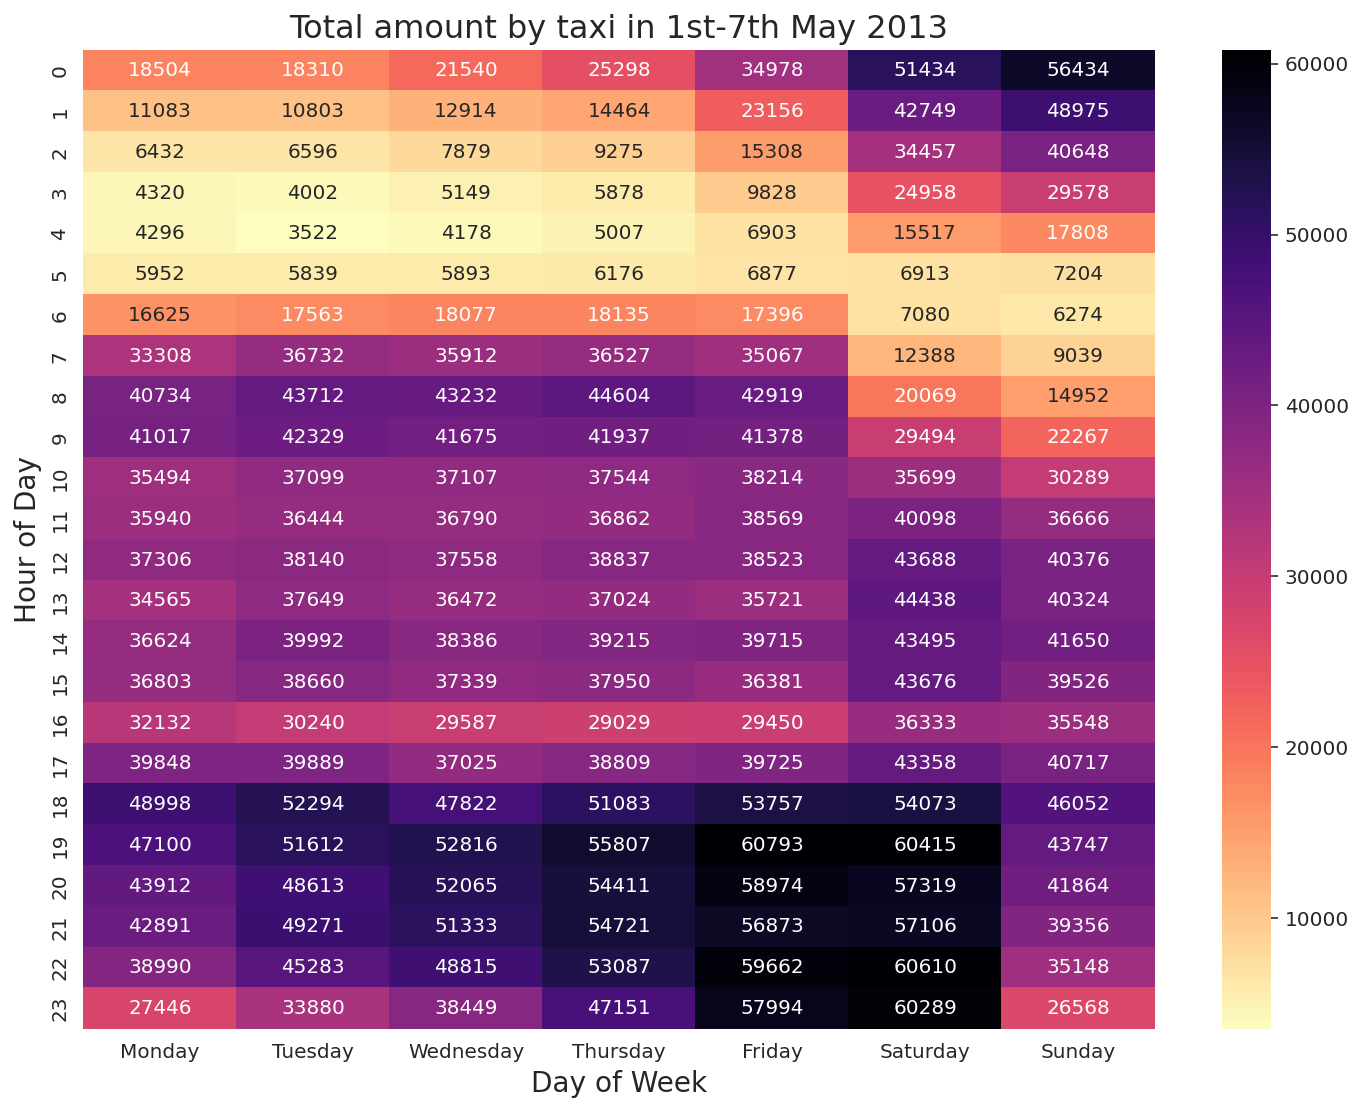

In [173]:
# What are the busiest days and hours for taxi drivers?
busiest_piv = pd.pivot_table(df, values="passenger_count",index=["Hour"], columns=["DayofWeek"], fill_value=0,aggfunc="sum")
busiest_piv = busiest_piv[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
#plot pivot table as heatmap using seaborn
fig, ax = plt.subplots(figsize=(12,9))
ax = sns.heatmap(busiest_piv, ax=ax, cmap='magma_r', annot=True, fmt="d")
ax.set_xlabel('Day of Week', fontsize=14)
ax.set_ylabel('Hour of Day', fontsize=14)
ax.set_title('Total amount by taxi in 1st-7th May 2013', fontsize=16)
None


In [104]:
# who are the higher earner? (distribution)
agg_query = "SELECT hack_license, sum(total_amount) AS total_amount, sum(trip_distance) AS total_distance, sum(trip_time_in_secs) as total_time, count(*) AS trip_count FROM df GROUP BY hack_license"
driver_df = duckdb.query(agg_query).df()
driver_df.head()

# FRM

# clustering



,hack_license,total_amount,total_distance,total_time,trip_count
0,1C4F0C1DF3A146AD043CC073AC09A8D2,1871.79,372.21,101760.0,134
1,51E6CA7E8DEDCEB32BF1AB21C0582034,1263.44,218.87,76620.0,108
2,BAACBB56DF754210460440682E090EAC,2019.07,420.75,108120.0,119
3,7EB892DD8E3918ED0B717B9DBD8D6D53,904.28,159.60,51900.0,74
4,A80E95FD0CA1B8518B8B90934D92D583,1834.06,323.89,103020.0,132


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


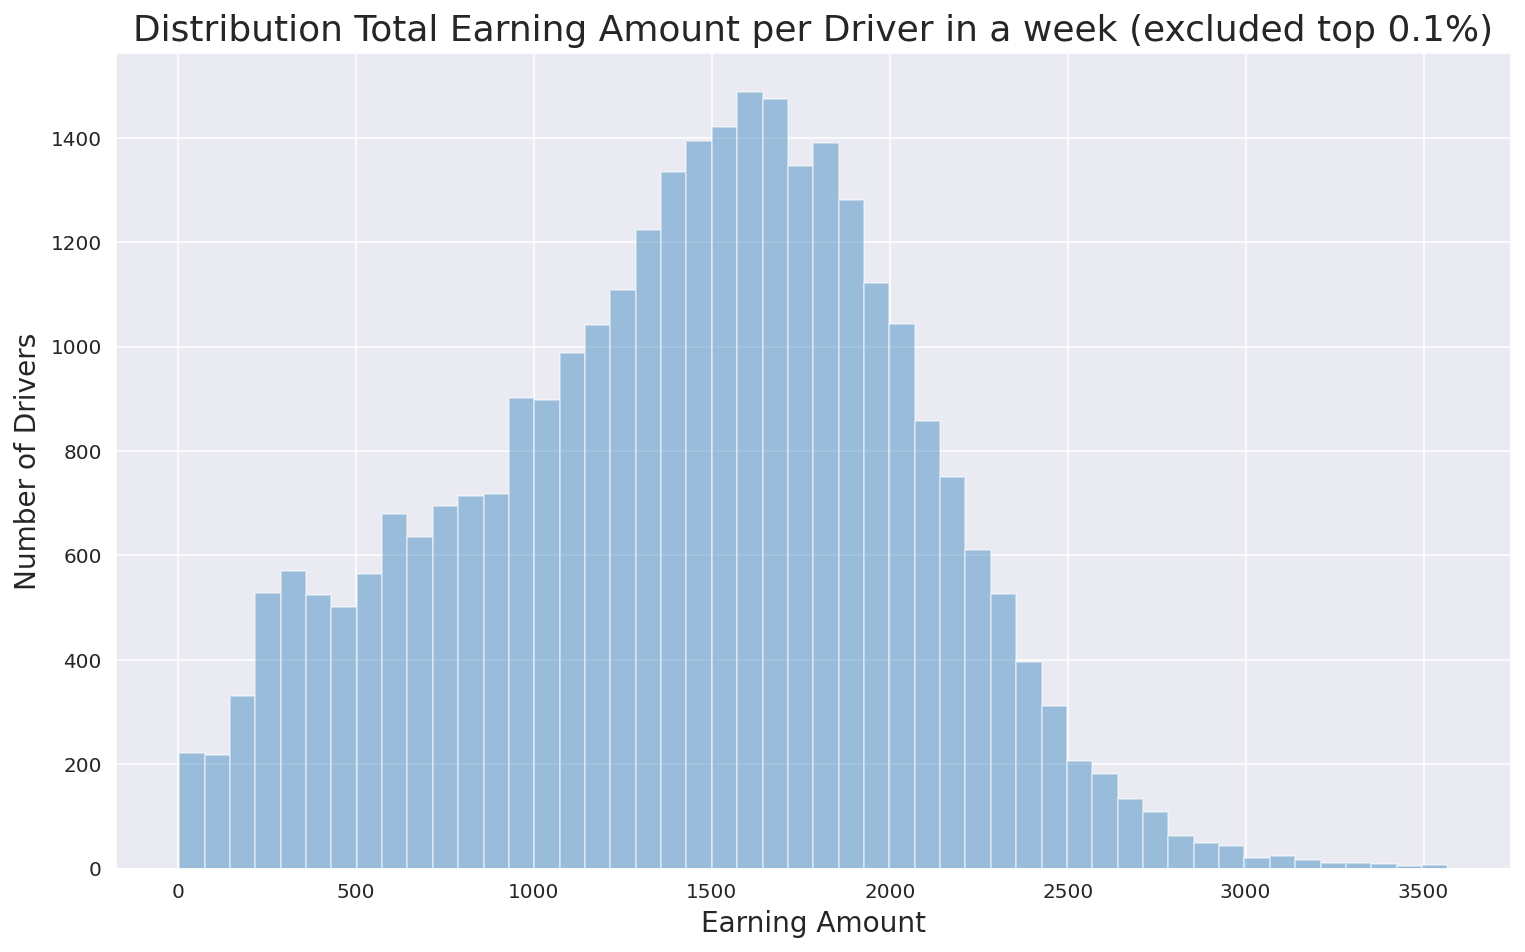

In [106]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(driver_df[driver_df.total_amount < driver_df.total_amount.quantile(0.999)].total_amount, kde=False)
ax.set_title('Distribution Total Earning Amount per Driver in a week (excluded top 0.1%)', fontsize=18)
ax.set_xlabel('Earning Amount', fontsize=14)
ax.set_ylabel('Number of Drivers', fontsize=14)
None

In [ ]:
# Clustering drivers:

# K-MEANS CLUSTERING
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

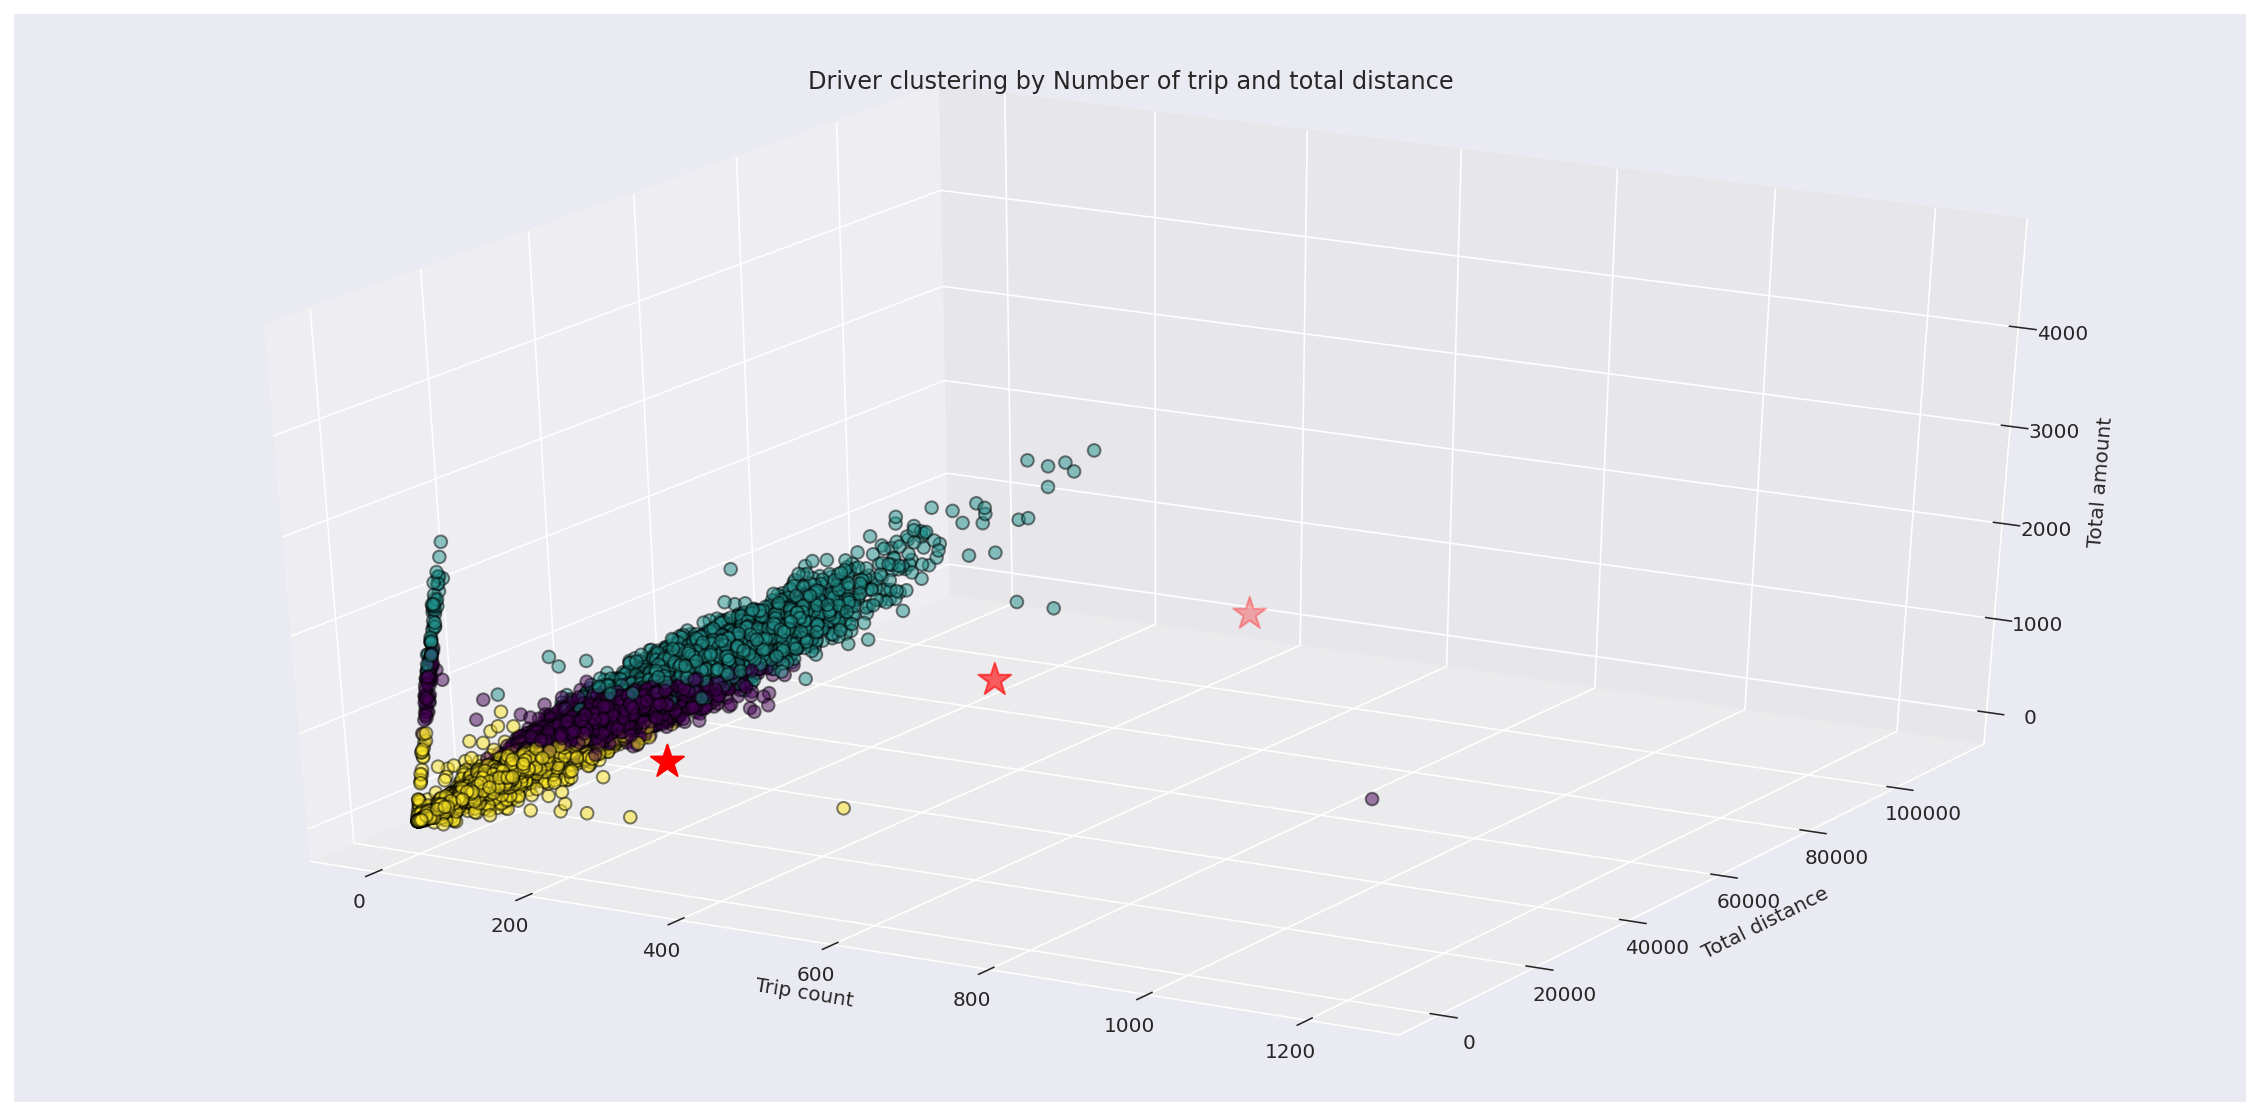

In [138]:
kmeans_PCA = KMeans(n_clusters=3, init='k-means++', max_iter= 300, n_init= 10, random_state= 3)

y_kmeans_PCA = kmeans_PCA.fit_predict(driver_df.iloc[:,2:])
y_kmeans_PCA

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(driver_df.iloc[:,2],driver_df.iloc[:,4],driver_df.iloc[:,1], 
            c=y_kmeans_PCA, cmap='viridis',
            edgecolor='k', s=40, alpha = 0.5)


ax.set_title("Driver clustering by Number of trip and total distance")
ax.set_xlabel("Trip count")
ax.set_ylabel("Total distance")
ax.set_zlabel("Total amount")
ax.dist = 10

ax.scatter(kmeans_PCA.cluster_centers_[:,0], kmeans_PCA.cluster_centers_[:,1], 
           kmeans_PCA.cluster_centers_[:,2], 
           s = 300, c = 'r', marker='*', label = 'Centroid')

plt.autoscale(enable=True, axis='x', tight=True)    

plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


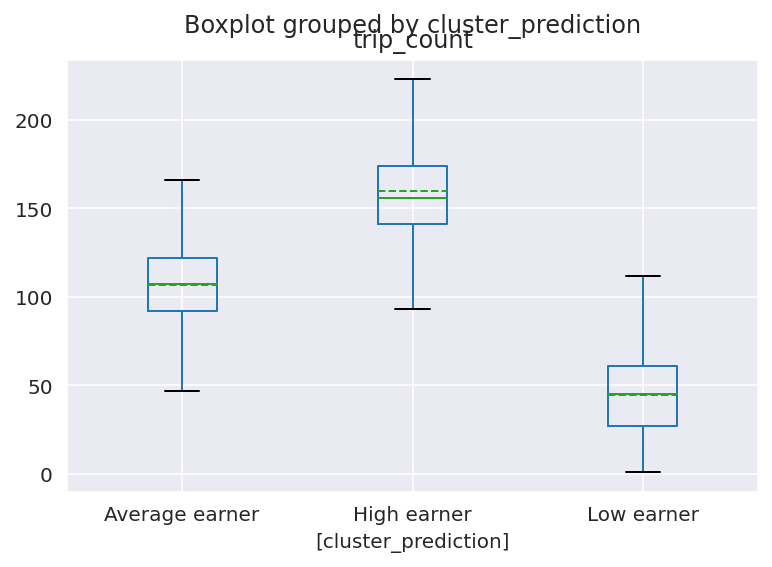

In [154]:
a1=driver_df[['trip_count','cluster_prediction']]
a1.boxplot(by = 'cluster_prediction', meanline=True, showmeans=True, showcaps=True, showbox=True,            
                 showfliers=False)
plt.xticks([1, 2 , 3], ['Average earner','High earner','Low earner'])

# show plot
plt.show()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


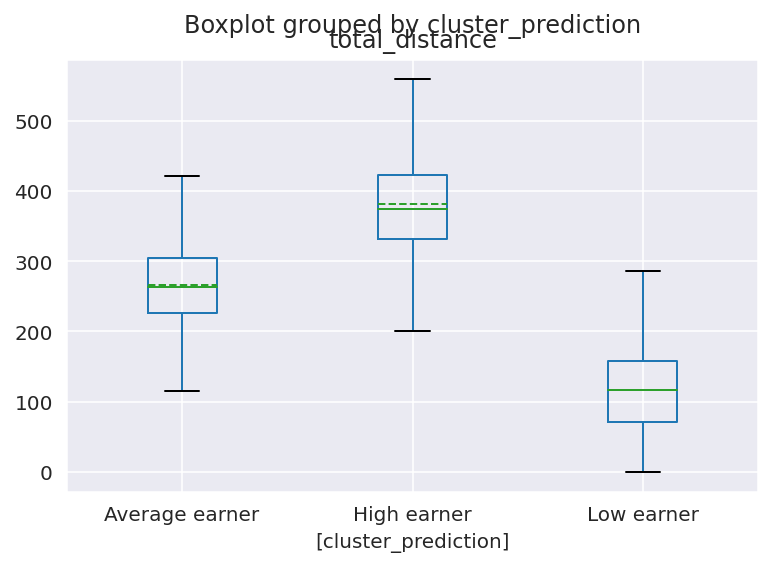

In [155]:
a2=driver_df[['total_distance','cluster_prediction']]
a2.boxplot(by = 'cluster_prediction', meanline=True, showmeans=True, showcaps=True, showbox=True,     
                 showfliers=False)

plt.xticks([1, 2 , 3], ['Average earner','High earner','Low earner'])

# show plot
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


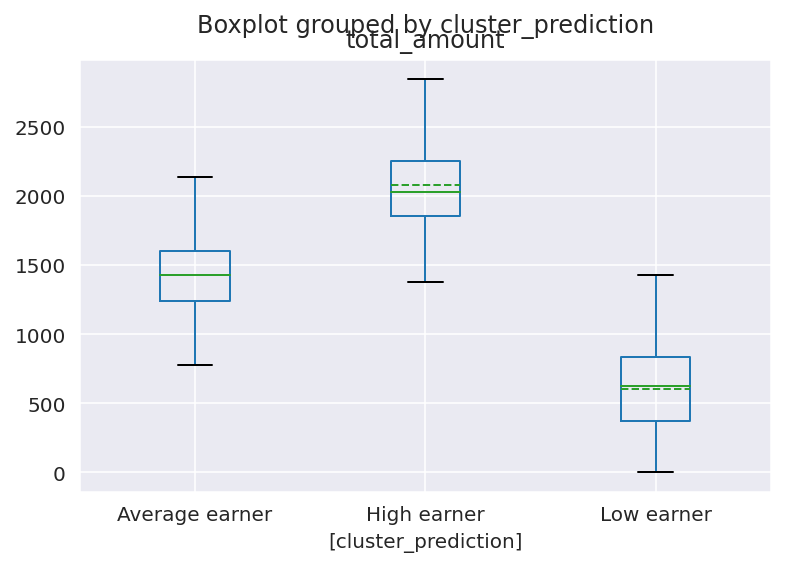

In [156]:
a3=driver_df[['total_amount','cluster_prediction']]
a3.boxplot(by = 'cluster_prediction', meanline=True, showmeans=True, showcaps=True, showbox=True,     
                 showfliers=False)
plt.xticks([1, 2 , 3], ['Average earner','High earner','Low earner'])

# show plot
plt.show()